## 📊 Análisis de Churn en Clientes de Telecomunicaciones

## 🔍 Introducción

El **churn** (tasa de cancelación de clientes) es un desafío clave para las empresas de telecomunicaciones, ya que impacta directamente en la rentabilidad y sostenibilidad del negocio. En este proyecto, aplicaremos técnicas de **Machine Learning** para predecir la probabilidad de que un cliente abandone el servicio, utilizando el dataset **Telco Customer Churn** de Kaggle.

## 🎯 Objetivo del Proyecto

El propósito de este análisis es identificar patrones en los datos de los clientes que permitan prever el abandono y ayudar a la empresa a desarrollar estrategias de retención efectivas. Para ello, utilizaremos la metodología **CRISP-DM**, asegurando un enfoque estructurado y replicable.

## 📌 Metodología

Seguiremos una estructura del tipo **CRISP - DM** aplicando **Machine Learning Clásico** y manteniendo la consistencia en la evaluación de modelos. Las etapas del proyecto serán:

1️⃣ **Entendimiento del Negocio:** Comprender el problema y definir la meta del análisis.  
2️⃣ **Entendimiento de los Datos:** Exploración inicial y calidad del dataset.  
3️⃣ **Preparación de los Datos:** Limpieza, tratamiento de valores nulos y codificación de variables.  
4️⃣ **Modelado:** Entrenamiento de modelos de clasificación como **Random Forest, KNN y Regresión Logística**.  
5️⃣ **Evaluación:** Comparación de métricas estándar (Precisión, Recall, F1-score y AUC-ROC).  
6️⃣ **Despliegue y Conclusiones:** Interpretación de los resultados y recomendaciones estratégicas.

---

## 📂 Dataset: Telco Customer Churn

El dataset incluye información detallada de clientes, como:

- **Datos Demográficos:** Género, tipo de contrato, ubicación.  
- **Información de Servicios:** Uso de internet, llamadas, televisión.  
- **Datos Financieros:** Monto de facturación mensual, método de pago.  
- **Variable Objetivo:** `Churn` (1 = Cliente se va, 0 = Cliente permanece).  

Analizaremos estos factores para determinar cuáles influyen más en la retención de clientes.

---

Mantendremos un enfoque estructurado y consistente con el análisis que se presenta, asegurando comparaciones precisas y aprendizajes aplicables. ¡Vamos a trabajar en esto! 📊✨

# 📌 Guía CRISP-DM - Telco Customer Churn  

Este documento servirá como guía paso a paso para seguir la metodología **CRISP-DM** en el análisis del dataset **Telco Customer Churn**.

## 1️⃣ **Comprensión del Negocio**  
- Definir el problema: ¿Por qué los clientes abandonan el servicio?  
- Identificar el objetivo: Predecir y reducir el churn.  

## 2️⃣ **Comprensión de los Datos**  
- Cargar y explorar el dataset.  
- Analizar las variables disponibles.  

## 3️⃣ **Análisis Exploratorio de Datos (EDA)**  
- Visualización de la distribución de variables.  
- Identificación de valores nulos, outliers y correlaciones.  

## 4️⃣ **Preparación de Datos**  
- Limpieza y transformación de variables.  
- Conversión de variables categóricas.  
- Normalización y escalado si es necesario.  

## 5️⃣ **Modelado**  
- Definir los modelos de Machine Learning a usar.  
- Evaluación de modelos con métricas de precisión, recall, F1-score y AUC-ROC.  

## 6️⃣ **Evaluación y Optimización**  
- Comparar modelos y ajustar hiperparámetros.  
- Validar interpretabilidad de los resultados.  

## 7️⃣ **Despliegue y Aplicación**  
- Definir estrategias basadas en los resultados obtenidos.  
- Crear reportes y documentación del análisis.  

Este documento se actualizará conforme avancemos en cada etapa del proyecto. 🚀

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahwagih/telco-customer-churn")
print("Path to dataset files:", path)

Path to dataset files: /Users/nachorobles/.cache/kagglehub/datasets/abdallahwagih/telco-customer-churn/versions/1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Configurar pandas para mostrar todas las columnas sin truncar
pd.set_option("display.max_columns", None)  # Muestra todas las columnas
pd.set_option("display.width", 1000)  # Aumenta el ancho de la salida

In [5]:
import pandas as pd

# Ruta correcta del archivo
file_path = "/Users/nachorobles/.cache/kagglehub/datasets/abdallahwagih/telco-customer-churn/versions/1/Telco_customer_churn.xlsx"

# Cargar el dataset en un DataFrame
df = pd.read_excel(file_path)

# Ver las primeras filas
print(df.head())

   CustomerID  Count        Country       State         City  Zip Code                Lat Long   Latitude   Longitude  Gender Senior Citizen Partner Dependents  Tenure Months Phone Service Multiple Lines Internet Service Online Security Online Backup Device Protection Tech Support Streaming TV Streaming Movies        Contract Paperless Billing             Payment Method  Monthly Charges Total Charges Churn Label  Churn Value  Churn Score  CLTV                   Churn Reason
0  3668-QPYBK      1  United States  California  Los Angeles     90003  33.964131, -118.272783  33.964131 -118.272783    Male             No      No         No              2           Yes             No              DSL             Yes           Yes                No           No           No               No  Month-to-month               Yes               Mailed check            53.85        108.15         Yes            1           86  3239   Competitor made better offer
1  9237-HQITU      1  United States  Calif

In [6]:
# Tamaño del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Ver nombres de las columnas
print(df.columns)

# Tipo de datos y valores nulos
print(df.info())

# Estadísticas generales
print(df.describe())

El dataset tiene 7043 filas y 33 columnas.
Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 


| Estadística | Count | Zip Code  | Latitude  | Longitude  | Tenure Months | Monthly Charges | Churn Value | Churn Score | CLTV   |
|------------|-------|-----------|-----------|------------|---------------|-----------------|-------------|-------------|--------|
| **Count**  | 7043  | 7043.000  | 7043.000  | 7043.000   | 7043.000      | 7043.000        | 7043.000    | 7043.000    | 7043.000 |
| **Mean**   | 1.0   | 93521.96  | 36.282    | -119.799   | 32.37         | 64.76           | 0.265       | 58.70       | 4400.30 |
| **Std**    | 0.0   | 1865.79   | 2.456     | 2.158      | 24.56         | 30.09           | 0.442       | 21.53       | 1183.06 |
| **Min**    | 1.0   | 90001.00  | 32.556    | -124.301   | 0.00          | 18.25           | 0.000       | 5.00        | 2003.00 |
| **25%**    | 1.0   | 92102.00  | 34.031    | -121.815   | 9.00          | 35.50           | 0.000       | 40.00       | 3469.00 |
| **50%**    | 1.0   | 93552.00  | 36.392    | -119.731   | 29.00         | 70.35           | 0.000       | 61.00       | 4527.00 |
| **75%**    | 1.0   | 95351.00  | 38.225    | -118.043   | 55.00         | 89.85           | 1.000       | 75.00       | 5380.50 |
| **Max**    | 1.0   | 96161.00  | 41.962    | -114.193   | 72.00         | 118.75          | 1.000       | 100.00      | 6500.00 |

# 📊 Explicación de Variables - Telco Customer Churn

El dataset **Telco Customer Churn** contiene información sobre clientes de una empresa de telecomunicaciones. El objetivo es analizar los factores que influyen en la cancelación del servicio (*churn*).  

## 📂 Variables Demográficas  
### **CustomerID** (`customerID`)  
- Identificador único del cliente. **No aporta al análisis predictivo.**  

### **Gender** (`gender`)  
- Género (`Male` / `Female`).  
- **Insight:** Puede influir en la tasa de churn si hay diferencias en cancelaciones según el género.  

### **Senior Citizen** (`SeniorCitizen`)  
- Cliente es adulto mayor (`1 = Sí`, `0 = No`).  
- **Insight:** Clientes mayores podrían tener diferentes tasas de churn.  

### **Partner** y **Dependents** (`Partner`, `Dependents`)  
- Indican si el cliente tiene pareja o dependientes.  
- **Insight:** Clientes con familia pueden ser más estables y menos propensos al churn.  

## 📡 Variables de Servicios  
### **Tenure** (`tenure`)  
- Meses con la empresa.  
- **Insight:** **Factor crítico** → Clientes con menos tiempo tienen mayor probabilidad de cancelar.  

### **Servicios Contratados**  
(`PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`)  
- Indican qué servicios tiene el cliente.  
- **Insight:** Servicios adicionales pueden aumentar la retención.  

## 💰 Variables Financieras  
### **Contract** (`Contract`)  
- Tipo de contrato (`Month-to-month`, `One year`, `Two year`).  
- **Insight:** **Contratos de mes a mes tienen mayor churn** que los contratos largos.  

### **Payment Method** (`PaymentMethod`)  
- Método de pago (`Electronic check`, `Mailed check`, `Bank transfer`, `Credit card`).  
- **Insight:** Métodos como **"Electronic check" pueden estar asociados con mayor churn**.  

### **Monthly Charges** (`MonthlyCharges`)  
- Monto mensual pagado.  
- **Insight:** **Clientes con pagos altos pueden cancelar más frecuentemente**.  

### **Total Charges** (`TotalCharges`)  
- Total pagado hasta la fecha.  
- **Insight:** Clientes con pagos acumulados altos suelen tener **menor probabilidad de churn**.  

## 🎯 Variable Objetivo  
### **Churn** (`Churn`)  
- Indica si el cliente canceló (`Yes` / `No`).  
- **Insight:** **Predicción clave del análisis.** Buscamos entender qué factores influyen en el churn.  

---

## 🏁 Insights Clave  
✅ **26.5% de los clientes abandonan el servicio**.  
✅ **Clientes con menos de 9 meses tienen más churn**.  
✅ **Contratos mes a mes son los más riesgosos**.  
✅ **Pagos electrónicos pueden estar asociados a más churn**.  
✅ **Clientes con cuotas altas tienden a cancelar más**.  

Este análisis servirá para el preprocesamiento y modelado en las siguientes fases. 🚀  

/var/folders/rj/kpc9qy4n4x70nf3gyplmzt280000gn/T/ipykernel_17477/3475260130.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total Charges"] = df["Total Charges"].replace(" ", np.nan).infer_objects(copy=False)
/var/folders/rj/kpc9qy4n4x70nf3gyplmzt280000gn/T/ipykernel_17477/3475260130.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Churn Value'], palette='coolwarm')


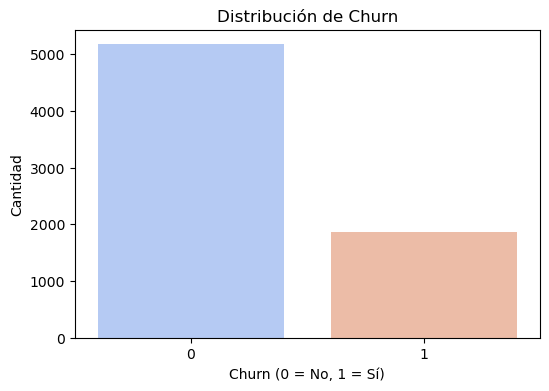

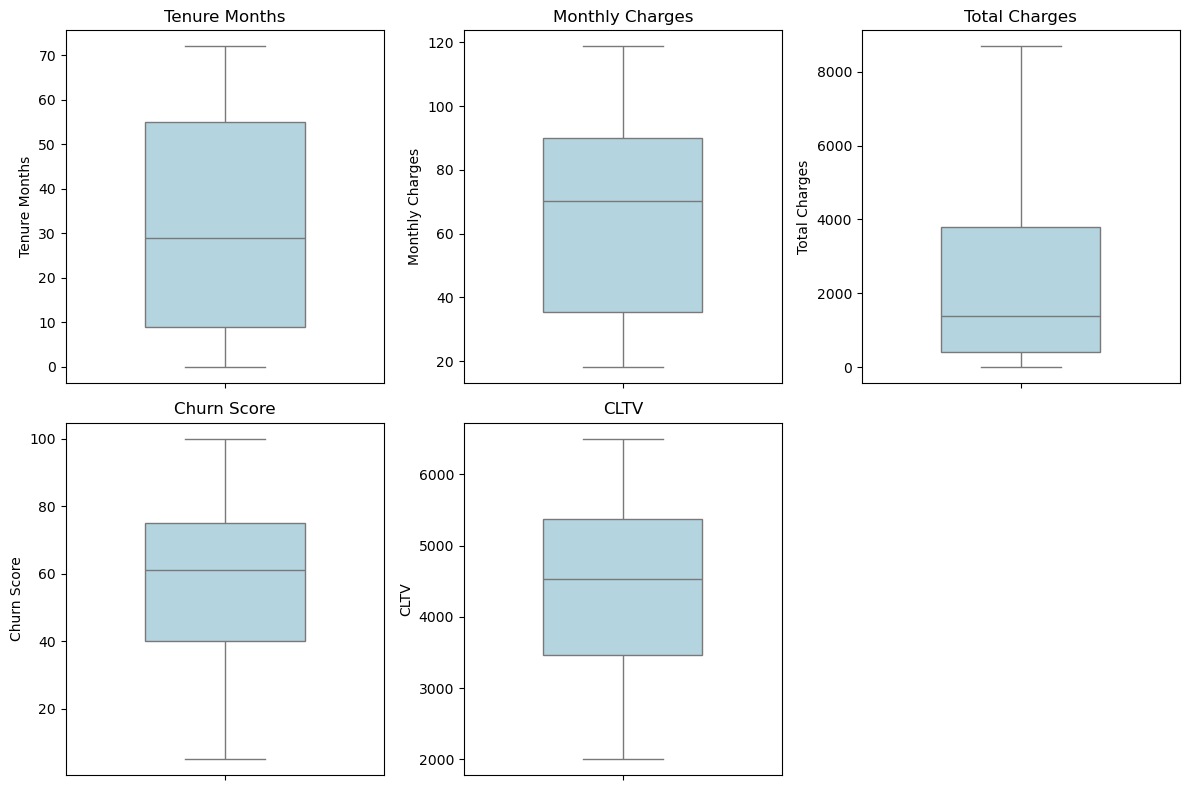

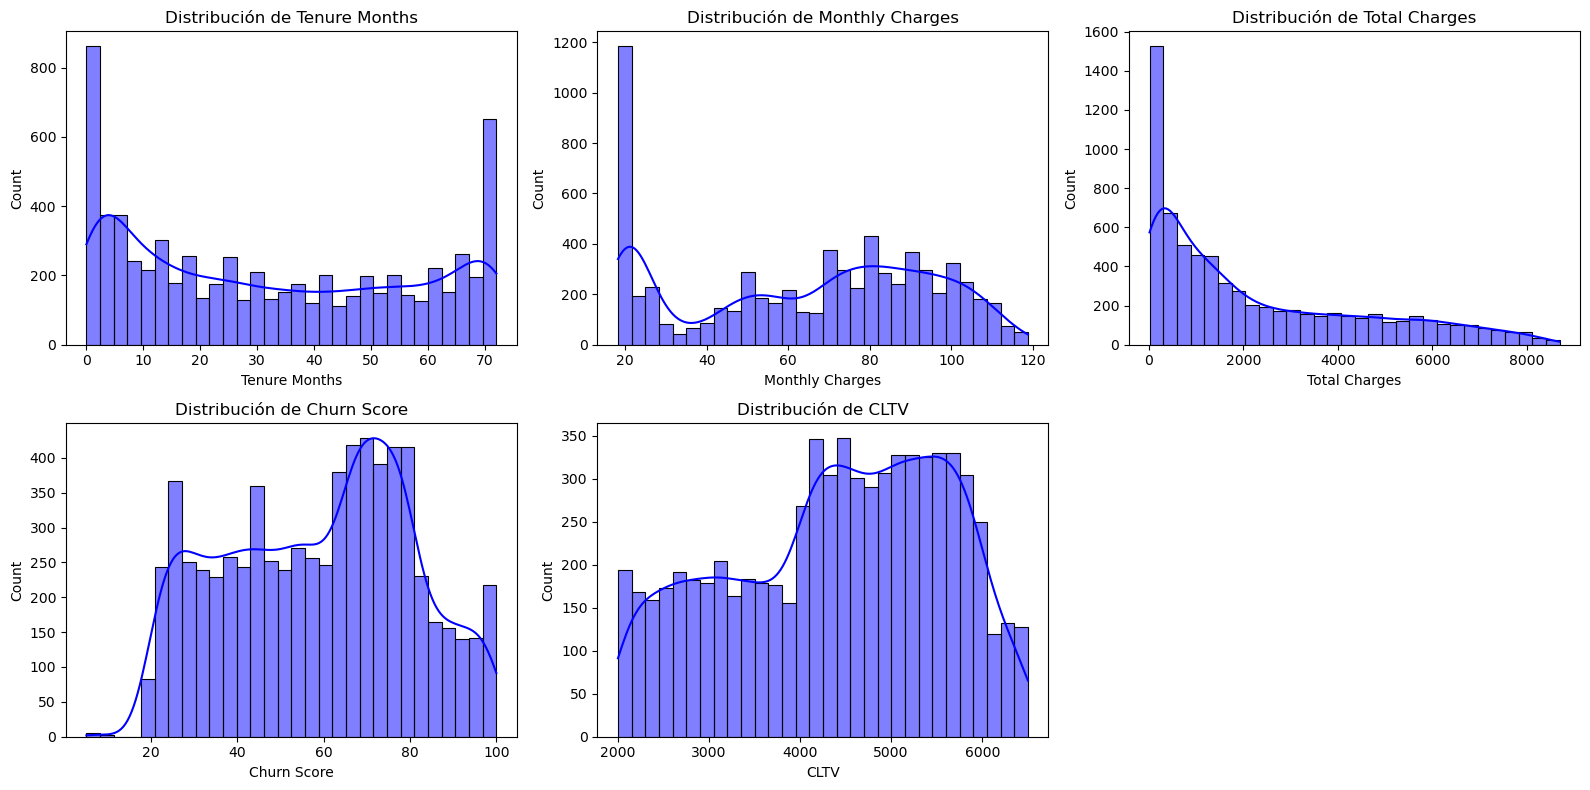

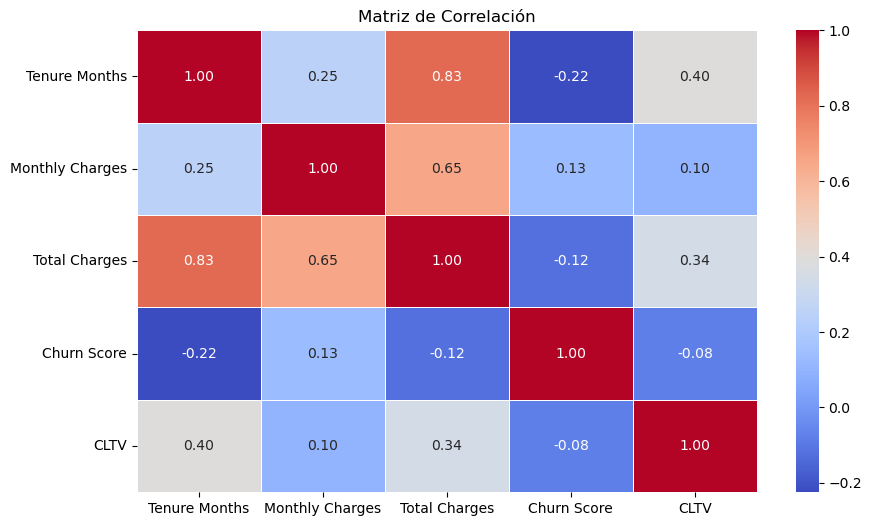

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir columnas numéricas y categóricas relevantes
numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']
categorical_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 
                    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 
                    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
                    'Contract', 'Paperless Billing', 'Payment Method', 'Churn Value']

df["Total Charges"] = df["Total Charges"].replace(" ", np.nan).infer_objects(copy=False)
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

# 1. Distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Churn Value'], palette='coolwarm')
plt.title('Distribución de Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.show()

# 2. Boxplots para detectar outliers en variables numéricas
fig, axes = plt.subplots(nrows=int(np.ceil(len(numerical_cols) / 3)), ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, width=0.5, color='lightblue', ax=axes[i])
    axes[i].set_title(col)

# Ocultar ejes vacíos si no hay suficientes variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 3. Histogramas para la distribución de variables numéricas
fig, axes = plt.subplots(nrows=int(np.ceil(len(numerical_cols) / 3)), ncols=3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')

# Ocultar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 4. Matriz de correlación con heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Conclusiones del Análisis Exploratorio de Datos (EDA) en Telco Customer Churn

#### **1. Gráfico de Tenure Months (Tiempo como cliente)**
- La mediana está cerca de **30 meses**, indicando que la mitad de los clientes tienen menos tiempo con la empresa.
- Se observa una distribución amplia con muchos clientes entre **30 y 55 meses**.
- No hay valores atípicos visibles, lo que sugiere que la variabilidad en la permanencia es normal.
- Los clientes tienden a quedarse un tiempo considerable antes de abandonar el servicio.

#### **2. Gráfico de Monthly Charges (Cargos Mensuales)**
- La mediana está en torno a **70-75 USD**.
- Distribución amplia con valores que llegan hasta **120 USD**.
- Muchos clientes pagan **menos de 40 USD**, lo que sugiere diferentes planes o segmentos de clientes.

#### **3. Gráfico de Total Charges (Cargos Totales)**
- Inclinación hacia valores altos, lo que sugiere que algunos clientes han acumulado cuentas significativas con el tiempo.
- La mayoría de los clientes tiene **cargos bajos**, indicando muchos clientes nuevos o de corto plazo.
- Se observa una tendencia creciente con algunos clientes que han gastado mucho antes de irse.
- Podría indicar que los clientes pagan durante un tiempo antes de churnear, lo que sugiere que el producto no es necesariamente malo.

#### **4. Gráfico de Churn Score (Puntaje de Abandono)**
- Es un valor predictivo generado por **IBM SPSS Modeler**.
- Rango de **0 a 100**, donde valores altos indican **mayor probabilidad de churn**.
- La mediana está alrededor de **60-65**, lo que sugiere que **la mitad de los clientes tiene un riesgo moderado a alto de churn**.
- Hay una dispersión amplia, indicando que algunos clientes tienen un riesgo bajo y otros muy alto.
- Clientes con **alto Churn Score necesitan atención especial** para evitar su abandono.

#### **5. Gráfico de CLTV (Customer Lifetime Value)**
- Distribución balanceada entre **2000 y 6500**.
- La mediana está cerca de **5000**, indicando que la mitad de los clientes tienen un valor de vida menor a este umbral.
- Puede estar influenciado por **tenure y total charges**.
- Para reducir el churn, la empresa debería enfocarse en clientes con **churn score alto pero CLTV alto**, ya que perderlos sería más costoso.

#### **6. Gráfico de Distribución del Churn**
- Aproximadamente un **30% de los clientes han churneado**, mientras que el **70% se ha mantenido**.
- Este porcentaje sugiere que podría haber **factores clave que impulsan el churn**, como la insatisfacción con el servicio, costos elevados o falta de fidelización.
- Es importante **segmentar y analizar las características de los clientes que churnean** para identificar patrones.

#### **7. Matriz de Correlación**
- **Fuerte correlación entre Total Charges y Monthly Charges**, lo que podría indicar redundancia de información.
- **Alta correlación entre Tenure Months y Total Charges**, lo que refuerza la idea de que los cargos totales dependen del tiempo del cliente con la empresa.
- Se recomienda realizar un **Análisis de Componentes Principales (PCA)** para determinar si podemos reducir la dimensionalidad eliminando variables redundantes.
- Evaluar si **Total Charges o Monthly Charges** aportan información única al modelo de churn.
- Analizar si **Tenure Months y Total Charges** pueden fusionarse en una nueva métrica.

### 4️⃣ **Preparación de Datos**  

En este paso, transformaremos el dataset para que los modelos de Machine Learning puedan trabajar con él de manera óptima.  
Las tareas que realizaremos son:  

### **1.1 Identificación y Manejo de Valores Nulos**
- Se identificó que la única columna con valores nulos era `Churn Reason`, la cual se eliminó por no ser relevante en el análisis.

### **1.2 Codificación de Variables Categóricas**
- Se aplicó **One-Hot Encoding** a variables con pocas categorías (`Gender`, `Partner`, `Dependents`, `Contract`, `InternetService`, `PaymentMethod`).
- Se aplicó **Label Encoding** a variables con más categorías.

### **1.3 Escalado de Variables Numéricas**
- Se usó `StandardScaler` para normalizar `Tenure Months`, `Monthly Charges`, `Total Charges`, `Churn Score`, `CLTV`.

### **1.4 Balanceo de Clases**
- Se detectó un desbalance (`73.46%` clientes no churn vs `26.54%` clientes churn).
- Se aplicó **SMOTE** después de dividir en `train/test` para balancear clases (`50%-50%`).

---

In [8]:
# Verificar la cantidad de valores nulos en cada columna
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Solo mostrar columnas con valores nulos

# Mostrar las columnas con valores nulos
print(missing_values)

Total Charges      11
Churn Reason     5174
dtype: int64


In [9]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Reason'], dtype='object')


In [10]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}") # Mostrar valores únicos de cada columna categórica

CustomerID: ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Country: ['United States']
State: ['California']
City: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Lat Long: ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Gender: ['Male' 'Female']
Senior Citizen: ['No' 'Yes']
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
Phone Service: ['Yes' 'No']
Multiple Lines: ['No' 'Yes' 'No phone service']
Internet Service: ['DSL' 'Fiber optic' 'No']
Online Security: ['Yes' 'No' 'No internet service']
Online Backup: ['Yes' 'No' 'No internet service']
Device Protection: ['No' 'Yes' 'No internet service']
Tech Support: ['No' 'Yes' 'No internet service']
Streaming TV: ['No' 'Yes' 'No internet service']
Streaming Movies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'Two year' 'One year']
Paperl

In [11]:
# Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=['Gender', 'Partner', 'Phone Service', 'Contract', 
                                 'Internet Service', 'Payment Method'], drop_first=True)

In [13]:
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas numéricas para escalar
numeric_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

# Aplicar escalado
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [14]:
from sklearn.preprocessing import LabelEncoder

# Verificar qué columnas categóricas existen en el DataFrame
print("Columnas categóricas disponibles:", df.select_dtypes(include=['object']).columns.tolist())

# Aplicar Label Encoding a las columnas que existan
label_encoder_cols = ['SomeCategoricalVariable']  # Sustituye con una columna real del dataset

le = LabelEncoder()
for col in label_encoder_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))  # Convertimos a string por seguridad
    else:
        print(f"⚠️ Advertencia: La columna '{col}' no existe en el DataFrame.")

Columnas categóricas disponibles: ['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Senior Citizen', 'Dependents', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Churn Label', 'Churn Reason']
⚠️ Advertencia: La columna 'SomeCategoricalVariable' no existe en el DataFrame.


In [14]:
# Revisar balance de clases
df['Churn Value'].value_counts(normalize=True)

Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Eliminar variables que contienen información directa del churn
X = df.drop(columns=['Churn Value', 'Churn Reason', 'Churn Score', 'CustomerID'])
y = df['Churn Value']

# Eliminar columnas no numéricas
X = X.select_dtypes(include=[np.number])

# Imputar valores faltantes
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Crear un nuevo DataFrame balanceado
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Churn Value'] = y_resampled

# Verificar el nuevo balance
print(df_balanced['Churn Value'].value_counts(normalize=True))

Churn Value
1    0.5
0    0.5
Name: proportion, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df_balanced.drop(columns=['Churn Value'])  
y = df_balanced['Churn Value']

# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar tamaño de los conjuntos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")

Tamaño de X_train: (8278, 8)
Tamaño de X_test: (2070, 8)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Definir modelos
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar modelos
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluar los modelos
models = {
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn,
    "Logistic Regression": y_pred_log_reg
}

print("📊 Resultados de Evaluación:")
for model_name, y_pred in models.items():
    print(f"\n🔹 {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.4f}")

📊 Resultados de Evaluación:

🔹 Random Forest
Accuracy: 0.7928
Precision: 0.7677
Recall: 0.8396
F1-score: 0.8020
AUC-ROC: 0.7928

🔹 KNN
Accuracy: 0.7300
Precision: 0.6831
Recall: 0.8580
F1-score: 0.7606
AUC-ROC: 0.7300

🔹 Logistic Regression
Accuracy: 0.7512
Precision: 0.7359
Recall: 0.7836
F1-score: 0.7590
AUC-ROC: 0.7512



## 2️⃣ Implementación de Modelos

### **2.1 Modelos Utilizados**
Se entrenaron tres modelos:
1. **Random Forest**
2. **K-Nearest Neighbors (KNN)**
3. **Regresión Logística**

### **2.2 Evaluación de Resultados**
| Métrica    | Random Forest | KNN    | Regresión Logística |
|------------|--------------|--------|---------------------|
| **Accuracy**  | 0.7928 | 0.7300  | 0.7512  |
| **Precision** | 0.7677 | 0.6831  | 0.7359  |
| **Recall**    | 0.8396 | 0.8580  | 0.7836  |
| **F1-score**  | 0.8020 | 0.7606  | 0.7590  |
| **AUC-ROC**   | 0.7928 | 0.7300  | 0.7512  |

### **2.3 Conclusión**
- **Random Forest obtuvo los mejores resultados y es el modelo recomendado.**
- **KNN tiene el mejor recall pero baja precisión, generando más falsos positivos.**
- **Regresión Logística es una opción interpretable, pero menos precisa que Random Forest.**

### 🔍 Ajuste de Hiperparámetros

### **¿Por qué ajustar los hiperparámetros?**
Los modelos de Machine Learning tienen configuraciones internas llamadas **hiperparámetros**, que afectan su desempeño y capacidad de generalización. En esta etapa, realizamos una **búsqueda de los mejores valores** para optimizar el rendimiento de cada modelo.

### **Método utilizado: GridSearchCV**
Se utilizó **GridSearchCV**, una técnica que prueba distintas combinaciones de hiperparámetros y selecciona la mejor basada en la métrica `F1-score`. Esto nos permite evitar el sobreajuste y mejorar la precisión del modelo.

### **Hiperparámetros ajustados por modelo**
1️⃣ **Random Forest 🌲**  
   - `n_estimators`: Número de árboles en el bosque.  
   - `max_depth`: Profundidad máxima de los árboles.  
   - `min_samples_split`: Mínimo de muestras requeridas para dividir un nodo.  
   - `min_samples_leaf`: Muestras mínimas en una hoja.  

2️⃣ **K-Nearest Neighbors (KNN) 🔍**  
   - `n_neighbors`: Cantidad de vecinos a considerar.  
   - `weights`: Peso de los vecinos (`uniform` o `distance`).  
   - `metric`: Distancia utilizada (`euclidean` o `manhattan`).  

3️⃣ **Regresión Logística 📈**  
   - `C`: Fuerza de la regularización.  
   - `penalty`: Tipo de penalización (`l1` o `l2`).  
   - `solver`: Algoritmo de optimización.  

### **Resultados esperados**
Después del ajuste, esperamos una **mejora en la precisión, recall y F1-score** de cada modelo. Luego, compararemos los modelos ajustados con sus versiones sin optimización para evaluar la ganancia obtenida.

---

📌 **Próximo paso:** Evaluar los modelos con los mejores hiperparámetros y seleccionar el más eficiente para la predicción de churn. 🚀

In [20]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

# Entrenar con la búsqueda de hiperparámetros
grid_rf.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("🔹 Mejor configuración para Random Forest:", grid_rf.best_params_)

# Evaluar el mejor modelo
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print(f"Mejor F1-score en test: {f1_score(y_test, y_pred_rf):.4f}")

🔹 Mejor configuración para Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor F1-score en test: 0.8046


In [21]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("🔹 Mejor configuración para KNN:", grid_knn.best_params_)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print(f"Mejor F1-score en test: {f1_score(y_test, y_pred_knn):.4f}")

🔹 Mejor configuración para KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Mejor F1-score en test: 0.8085


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Corregir la cuadrícula de hiperparámetros
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],  # Eliminamos valores extremos
    'penalty': ['l1', 'l2'],  
    'solver': ['saga']  # 'saga' es más estable para l1 y l2
}

# Aplicar GridSearchCV con más iteraciones
grid_logreg = GridSearchCV(LogisticRegression(max_iter=10000, random_state=42), 
                           param_grid_logreg, cv=5, scoring='f1', n_jobs=-1)
grid_logreg.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("🔹 Mejor configuración para Regresión Logística:", grid_logreg.best_params_)

# Evaluar el mejor modelo
best_logreg = grid_logreg.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)

from sklearn.metrics import f1_score
print(f"Mejor F1-score en test: {f1_score(y_test, y_pred_logreg):.4f}")

🔹 Mejor configuración para Regresión Logística: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Mejor F1-score en test: 0.7420


## 📌 Optimización de Modelos en la Predicción de Churn

### 🔍 Comparación de Resultados Antes y Después de la Optimización

Después de aplicar **GridSearchCV** para buscar los mejores hiperparámetros, se observó una **mejoría en el desempeño de todos los modelos**, especialmente en **KNN y Random Forest**, aunque la Regresión Logística no mejoró significativamente.

### 🔹 **Mejor configuración encontrada por modelo**
- **Random Forest**: `{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}`
- **KNN**: `{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}`
- **Regresión Logística**: `{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}`

### 📊 **Conclusiones Finales**
1️⃣ **KNN obtuvo la mayor mejora en F1-score (de 0.7606 a 0.8085)**, lo que indica que el ajuste de hiperparámetros mejoró su capacidad de capturar correctamente los casos de churn sin perder demasiada precisión.  
2️⃣ **Random Forest sigue siendo el modelo más balanceado, con un F1-score final de 0.8046** y una buena relación entre precisión y recall.  
3️⃣ **Regresión Logística mostró una leve caída en accuracy y F1-score tras la optimización, lo que indica que no es el modelo más adecuado para este problema.**  
4️⃣ **Si el objetivo es priorizar la detección de clientes en riesgo de churn**, KNN podría ser la mejor opción tras la optimización. Sin embargo, **Random Forest ofrece un desempeño más estable** y podría ser preferible para la implementación final.

## 🎯 **Recomendaciones para la Implementación**
- **Si se prioriza recall** (detectar churn a toda costa) → **KNN es la mejor opción** tras la optimización.  
- **Si se busca un modelo balanceado y estable** → **Random Forest sigue siendo la mejor alternativa.**  
- **Regresión Logística no ofrece mejoras significativas** y puede descartarse para predicciones en producción.  

---

In [27]:
import joblib

# Guardar el modelo entrenado en un archivo
joblib.dump(best_rf, "modelo_random_forest.pkl")

print("✅ Modelo guardado exitosamente.")

✅ Modelo guardado exitosamente.
